In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
Chinesefont = mpl.font_manager.FontProperties(fname='C:\Windows\Fonts\simsun.ttc')



In [3]:
link = pd.read_csv("linkCoordinates.csv")

In [4]:
link.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY
0,AL1000,A38 between A513 and A5127 (AL1000),A513,A5127,417216.0,314346.0,414414.0,310549.0
1,AL1001,A38 between A5127 and A513 (AL1001),A5127,A513,414399.0,310543.0,417204.0,314350.0
2,AL1004,A38 between A513 and A5121 (AL1004),A513,A5121,417204.0,314350.0,421987.0,321236.0
3,AL1007,A38 between A5121 and A513 (AL1007),A5121,A513,422031.0,321346.0,417216.0,314346.0
4,AL1012,A42 between A511 and M42 J11 (AL1012),A511,M42 J11,437463.0,317050.0,430734.0,310772.0


In [5]:
link.shape

(2510, 8)

In [6]:
link['LinkRef'].nunique()

2510

In [7]:
link.dropna(inplace=True)

In [8]:
link['xCenter'] = (link['StartX'] + link['EndX'])/2
link['yCenter'] = (link['StartY'] + link['EndY'])/2

In [9]:
# link['isAL'] = link['LinkRef'].str.contains("AL")

# ax = link[link['isAL']==True].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkBlue', label='AL');
# link[link['isAL']==False].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkGreen', label='FL', ax=ax);

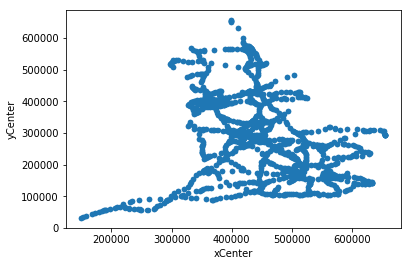

In [10]:
# fig, ax = plt.subplots(figsize=(9, 4))
# plt.xlabel('数据缺失率(%)', fontproperties = Chinesefont,fontsize=13)
# plt.ylabel('RMSE', fontsize=13)
# # plt.margins(0.05, 0.15)
# plt.scatter(link['xCenter'], link['yCenter'])
# plt.show()

link.plot.scatter(x = 'xCenter', y = 'yCenter')

In [11]:
null_point = ['AL1352', 'AL1353', 'AL1380A', 'AL1381A', 'AL2567', 'AL2568', 'AL2572', 'AL257A', 'AL2739', 'AL2740', 'AL320A', 'AL3510', 'LM1048A', 'LM1511', 'LM1512', 'LM153', 'LM154', 'LM316', 'LM382', 'LM514', 'LM631A', 'LM796', 'LM797', 'LM962', 'LM963']
null_point = null_point+['LM100', 'LM99']

In [12]:
x_up = 630000
x_bottom = 411500
y_up = 307800
y_bottom = 80000

london_link = link[(link['xCenter']>x_bottom) & (link['xCenter']<x_up) & (link['yCenter']<y_up) & (link['yCenter']>y_bottom)]
london_link[~london_link['LinkRef'].isin(null_point)].shape

(1024, 10)

In [13]:
london_link = london_link[~london_link['LinkRef'].isin(null_point)]

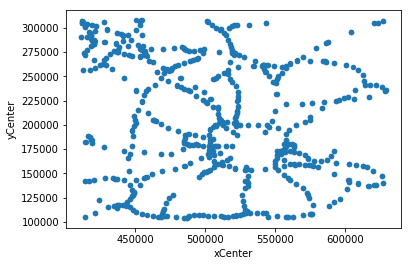

In [14]:
# ax = london_link.plot.scatter(x = 'xCenter', y = 'yCenter')
# london_link[london_link['LinkRef'].isin(null_point)].plot.scatter(x = 'xCenter', y = 'yCenter', s=250, c='black', ax=ax)
london_link.plot.scatter(x = 'xCenter', y = 'yCenter')

In [15]:
max(london_link['yCenter'])

307750.5

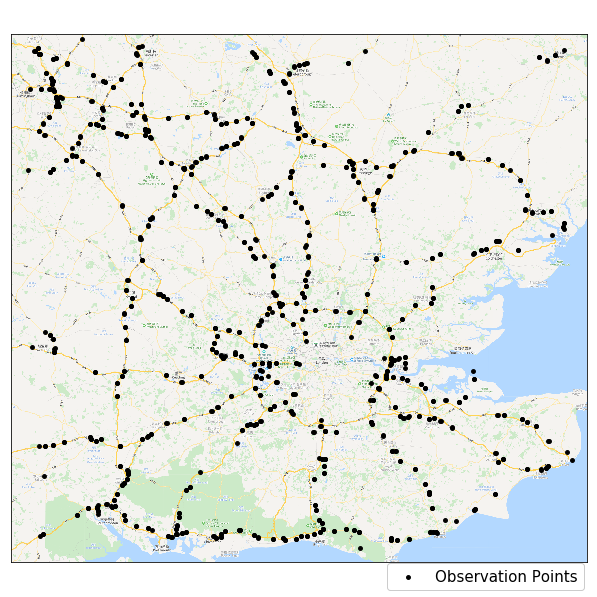

In [32]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc")
Englishfont = FontProperties(fname='C:\Windows\fonts\timesi.ttc')
%matplotlib inline
plt_size = 10.0
plt.rcParams['figure.figsize'] = (plt_size, plt_size) # 设置figure_size尺寸

london_link_X = london_link['StartX'].copy(deep=True)
london_link_Y = london_link['StartY'].copy(deep=True)

fig=plt.figure()
rect=[0.1,0.1,0.8,0.8]
scatterMarkers=['s','o','^','8','p','d','v','h','>','<']
axprops=dict(xticks=[],yticks=[])
ax0=fig.add_axes(rect,label='ax0',**axprops)

# imgP=plt.imread('D:\juypterNotebook\dataRecovery\\aaa.jpg')
imgP=plt.imread('D:\juypterNotebook\dataRecovery\data\\london3.png')
ax0.imshow(imgP,cmap='gray')
ax1=fig.add_axes(rect,label='ax1',frameon=False)
# ax1.set_autoscale_on(False)
ax1.set_xlim(left=400000, right=580000, emit=True, auto=False)
ax1.set_ylim(bottom=80000, top=300000, emit=True, auto=False)

# 由于原数据为绝对坐标信息而非经纬度，在图片显示需对坐标值进行修改
london_link_Y[(london_link_X>520000) & (london_link_Y<160000) & (london_link_Y>120000)] = \
    london_link_Y[(london_link_X>520000) & (london_link_Y<160000) & (london_link_Y>120000)]-3000
    
london_link_Y[(london_link_X<500000)] = london_link_Y[(london_link_X<500000)]+2000
# markerStyle=scatterMarkers[random.randint(1,6)%len(scatterMarkers)]
# ax1.scatter(london_link['StartX']*0.75+105000,london_link['StartY']*0.90+3000, marker='.', s=50, c='k')
ax1.scatter(london_link_X*0.76+95000, london_link_Y*0.92+1000, marker='.', s=60, c='k')
plt.xticks([])
plt.yticks([])
# plt.legend(bbox_to_anchor=(0.8, 0.09), loc=2, borderaxespad=0, fontsize=60, labels=['交通数据观测点'], prop=Chinesefont)

plt.axis('off')

plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
# plt.legend(bbox_to_anchor=(0.995, 0.04), loc=0, borderaxespad=0, fontsize=60, labels=['交通数据观测点'], prop=font, framealpha=1)
plt.legend(bbox_to_anchor=(0.995, 0.04), loc=0, borderaxespad=0, fontsize=15, labels=['Observation Points'], framealpha=1)

plt.rcParams.update({'font.size': 22})
plt.savefig("地图交通采集点彩色英文.png", dpi=500)

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\juypterNotebook\\dataRecovery\\aaa.jpg'

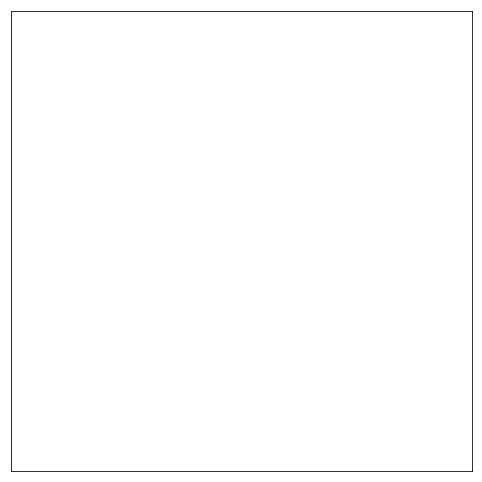

In [33]:
%matplotlib inline
plt_size = 8.0
plt.rcParams['figure.figsize'] = (plt_size, plt_size) # 设置figure_size尺寸

fig=plt.figure()
rect=[0.1,0.1,0.8,0.8]
scatterMarkers=['s','o','^','8','p','d','v','h','>','<']
axprops=dict(xticks=[],yticks=[])
ax0=fig.add_axes(rect,label='ax0',**axprops)

imgP=plt.imread('D:\juypterNotebook\dataRecovery\\aaa.jpg')
ax0.imshow(imgP)
ax1=fig.add_axes(rect,label='ax1',frameon=False)
# ax1.set_autoscale_on(False)
ax1.set_xlim(left=400000, right=580000, emit=True, auto=False)
ax1.set_ylim(bottom=80000, top=300000, emit=True, auto=False)

# markerStyle=scatterMarkers[random.randint(1,6)%len(scatterMarkers)]
ax1.scatter(london_link['StartX']*0.75+105000,london_link['StartY']*0.90+3000, marker='.', s=10, c='k')
plt.show() 


In [45]:
london_link.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY,xCenter,yCenter
6,AL1018,A46 between A50 and A5630 (AL1018),A50,A5630,453813.0,307385.0,455243.0,307845.0,454528.0,307615.0
7,AL1020,A46 between A5630 and A50 (AL1020),A5630,A50,455329.0,307897.0,453900.0,307423.0,454614.5,307660.0
33,AL11,A303 between A338 and A3028 (AL11),A338,A3028,423161.0,143705.0,418714.0,142392.0,420937.5,143048.5
66,AL12,A303 between A3028 and A338 (AL12),A3028,A338,418701.0,142402.0,423189.0,143727.0,420945.0,143064.5
113,AL13,A303 between A338 and A342 (AL13),A338,A342,423189.0,143727.0,433837.0,145784.0,428513.0,144755.5


In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=16, random_state=0).fit(london_link[['xCenter','yCenter']])
# london_link['cluster'] = kmeans.predict(london_link[['xCenter','yCenter']])

# cluster_point = kmeans.cluster_centers_

# # sns.lmplot('xCenter', 'yCenter', data=london_link, hue='cluster', fit_reg=False, scatter_kws={"s": 30, "alpha": 1})
# color_list = ['darkcyan', 'DarkGreen', 'darkred', 'darkgoldenrod', 'darkgray', 'darkkhaki', 'darkmagenta','darkorange','darkorchid','darksalmon','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet']

# ax = london_link[london_link['cluster']==0].plot.scatter(x = 'xCenter', y = 'yCenter', color='DarkBlue', label='0');
# for i in range(1, 16):
#     london_link[london_link['cluster']==i].plot.scatter(x = 'xCenter', y = 'yCenter', color=color_list[i-1], label=i , ax=ax)
#     print(london_link[london_link['cluster']==i].shape)
    
# for i in range(16):
#     plt.scatter(x=cluster_point[i][0], y=cluster_point[i][1], s=50, c='black')
#     plt.annotate(i, (cluster_point[i][0]+100,cluster_point[i][1]+100),zorder=99999,fontsize=16)


In [35]:
matrix_constructor = london_link.sort_values(by='yCenter', ascending=False)
matrix_constructor['xCoordinate'] = 0
matrix_constructor['yCoordinate'] = 0
matrix_constructor.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY,xCenter,yCenter,xCoordinate,yCoordinate
1592,LM179,M1 between M1 J21A and M1 J22 (LM179),M1 J21A,M1 J22,453062.0,304417.0,447920.0,311084.0,450491.0,307750.5,0,0
7,AL1020,A46 between A5630 and A50 (AL1020),A5630,A50,455329.0,307897.0,453900.0,307423.0,454614.5,307660.0,0,0
6,AL1018,A46 between A50 and A5630 (AL1018),A50,A5630,453813.0,307385.0,455243.0,307845.0,454528.0,307615.0,0,0
1414,AL972,A47 between A146 and A1042 (AL972),A146,A1042,625022.0,306228.0,628798.0,308515.0,626910.0,307371.5,0,0
1413,AL971,A47 between A1042 and A146 (AL971),A1042,A146,628806.0,308505.0,625047.0,306234.0,626926.5,307369.5,0,0


In [36]:
for i in range(32):
    start_idx = i*32
    end_idx = (i+1)*32
    idx = matrix_constructor[start_idx: end_idx].sort_values(by='xCenter', ascending=True).index
    matrix_constructor.loc[idx, 'yCoordinate'] = i
    matrix_constructor.loc[idx, 'xCoordinate'] = list(range(32))

In [41]:
matrix_constructor.head()

,LinkRef,LinkDescription,StartJunction,EndJunction,StartX,StartY,EndX,EndY,xCenter,yCenter,xCoordinate,yCoordinate
1592,LM179,M1 between M1 J21A and M1 J22 (LM179),M1 J21A,M1 J22,453062.0,304417.0,447920.0,311084.0,450491.0,307750.5,13,0
7,AL1020,A46 between A5630 and A50 (AL1020),A5630,A50,455329.0,307897.0,453900.0,307423.0,454614.5,307660.0,17,0
6,AL1018,A46 between A50 and A5630 (AL1018),A50,A5630,453813.0,307385.0,455243.0,307845.0,454528.0,307615.0,16,0
1414,AL972,A47 between A146 and A1042 (AL972),A146,A1042,625022.0,306228.0,628798.0,308515.0,626910.0,307371.5,30,0
1413,AL971,A47 between A1042 and A146 (AL971),A1042,A146,628806.0,308505.0,625047.0,306234.0,626926.5,307369.5,31,0


交通量数据

In [39]:
data_dir = './data/2013_06Jun_SRNData.csv'
trafficV = pd.read_csv(data_dir)
# drop_col = ['LinkDescription', 'AverageJT', 'AverageSpeed', 'DataQuality', 'LinkLength']
# trafficV.drop(drop_col, axis=1, inplace=True)
trafficV.shape

(7191360, 9)

In [55]:
trafficV['DataQuality'].describe()

count    7.191360e+06
mean     1.401681e+00
std      7.952908e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.000000e+00
Name: DataQuality, dtype: float64

In [ ]:
#该月份统计路段出现null
set(trafficV[trafficV['Flow'].isnull()]['LinkRef'])

In [ ]:
trafficV = trafficV.merge(matrix_constructor[['LinkRef', 'xCoordinate', 'yCoordinate']], how='right', on='LinkRef')
trafficV.head()

In [ ]:
#该月份未统计路段 如不为空表明选中32*32监测点在该月份有NAN
set(trafficV[trafficV['Flow'].isnull()]['LinkRef'])

In [ ]:
#该月份非空待处理数据是否合法
96*1024*30==trafficV.notnull().shape[0]

In [ ]:
trafficV['Time'] = pd.to_datetime(trafficV['Date'])+ pd.Timedelta(15, unit='m') * trafficV['TimePeriod']
trafficV.drop(['Date', 'TimePeriod'], axis=1, inplace=True)

In [ ]:
trafficV['Time'] = trafficV['Time'].astype('datetime64[ns]')

In [ ]:
trafficV['Time'].dtype

In [ ]:
# trafficV.to_csv('./data/trafficV201306.csv', index=False)

In [ ]:
trafficV = pd.read_csv('./data/trafficV201303.csv')
trafficV.shape